# Métodos Supervisados
# Tarea #3 (Grupos de dos integrantes)
## Estudiantes: Nayely Márquez y Fabián Parra

Crear un ambiente de trabajo (.ipynb) basado en PYTHON3 y llamarle Tarea-3.ipynb, con las librerías que
considere oportuno.

El objetivo de la Tarea 3 consiste en elegir un conjunto de datos de mediana complejidad que no sea trivial
(es decir, que permita alcanzar las actividades de la tarea), y aplicarle algunos algoritmos supervisados de
su elección, de la siguiente forma:

1. Investigar sobre las métricas para evaluación de los modelos de aprendizaje supervisado, tanto para
clasificación como para regresión, debe explicar el detalle de cada métrica y plantear un ejemplo de
cada una, según sea el caso.
2. Elegir el dataset trazar la estrategia del problema basado en su naturaleza (regresión o clasificación).
3. De ser necesario un pre-procesado, debe llevarlo a cabo.
4. Aplicar 3 métodos de su elección de los vistos en clase, creando una estrategia de modificación de los
hiper-parámetros para mejora del modelo, elección de features óptimos y elaborar un análisis completo
de los resultados obtenidos.
5. Ejecutar el mismo análisis anterior pero esta vez para un método de ensamble que no se haya visto
en clase. Indique ademas, en que consisten los métodos de ensamble y cuáles son sus principales
características.
6. Para los puntos 4 y 5, debe de recurrir a las métricas que investigó en el punto 1.
7. No olvide el análisis científico que se espera de esta tarea, justifique en todo momento los resultados
y haga un buen uso de la Notebook.

El entregable consiste en el url de la notebook Tarea-3.ipynb en GITHUB o COLLAB. Enviar al TEC
Digital un archivo .txt con el url de la Notebook, en la fecha acordada en clase, envíos pasado el limite de
entrega se aplicará la penalizaci´on discutida en clase.

En clasificación hay varias **métricas** para evaluar los modelos y normalmente se conocen como **Indicadores de desempeño**.

Los principales para **modelos de clasificación** son:
    
**1. Matriz de confusión**

Contiene información de las predicciones realizadas por el modelo, comparando los elementos de la predicción con la clase a la que estos pertenecen realmente.

Ejemplo para clasificación de dos clases:
    
| Valores    |     Valor Predicho     |  |
|------------|----------|----------|
| Valor Real | Negativo | Positivo |
| Negativo   |     a    |     b    |
| Positivo   |      c   |     d    |

En este ejemplo tenemos dos clases de clasificación, **Negativo** y **Positivo**.
Donde:
- a representa los elementos de la clase **Negativo** que se clasificaron **bien** con la predicción del modelo. 
- b representa los elementos de la clase **Negativo** que se clasificaron **mal** con la predicción del modelo.
- c representa los elementos de la clase **Positivo** que se clasificaron **mal** con la predicción del modelo.
- d representa los elementos de la clase **Positivo** que se clasificaron **bien** con la predicción del modelo.

Con la Matriz de Confusión se pueden calcular varios indicadores:

- **Error(e)** Es la proporción de predicciones **incorrectas** conrespecto al total

    $e=\frac{(b+c)}{(a+b+c+d)}$

- **Falso Positivo (FP)** es la proporción de casos negativos que se clasificaron erroneamente como positivos

    $FP=\frac{b}{(a+b)}$
    
- **Falso Negativo (FN)** es la proporción de casos positivos que se clasificaron erroneamente como negativos

    $FN=\frac{c}{(c+d)}$

- **Precisión (p)** Es la proporción de predicciones **correctas** conrespecto al total

    $p=\frac{(a+d)}{(a+b+c+d)}$

- **Precisión Positiva (PP)** es la proporción de casos positivos que se clasificaron correctamente como positivos

    $PP=\frac{d}{(c+d)}$
    
- **Precisión Negativa (PN)** es la proporción de casos negativos que se clasificaron erroneamente como negativos

    $PN=\frac{a}{(a+b)}$


    

Ejemplo:

Se utiliza un modelo que clasifica clientes como buenos o malos.

In [1]:
from sklearn.metrics import confusion_matrix

y_true = [0, 0, 0, 1, 1, 1, 1, 1,0,0]
y_pred = [0, 1, 0, 1, 0, 1, 1, 1,0,1]

print("Matriz de confusión")
print(confusion_matrix(y_true, y_pred))

a, b, c, d = confusion_matrix(y_true, y_pred).ravel()

print("==============================================")
print("Clientes malos clasificados correctamente (a)",a) 
print("Clientes malos clasificados incorrectamente (b)",b) 
print("Clientes buenos clasificados incorrectamente (c)",c) 
print("Clientes buenos clasificados correctamente (d)",d) 

print("==============================================")
print("Indicadores:")

print("Error:",(b+c)/(a+b+c+d))
print("FP:",(b)/(a+b))
print("FN:",(c)/(c+d))

print("Precisión:",(a+d)/(a+b+c+d))
print("PP:",(d)/(c+d))
print("PN:",(a)/(a+b))


Matriz de confusión
[[3 2]
 [1 4]]
Clientes malos clasificados correctamente (a) 3
Clientes malos clasificados incorrectamente (b) 2
Clientes buenos clasificados incorrectamente (c) 1
Clientes buenos clasificados correctamente (d) 4
Indicadores:
Error: 0.3
FP: 0.4
FN: 0.2
Precisión: 0.7
PP: 0.8
PN: 0.6


El **error** también se puede obtener utilizando:

In [2]:
from sklearn.metrics import hamming_loss
hamming_loss(y_true, y_pred)

0.3

La **precisión** se puede obtener utilizando:

In [3]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.7

**2. AUC: Área bajo la curva ROC**  
La curva ROC es un gráfico que muestra el rendimiento del modelo en todos los umbrales de clasificación.
Se grafican los FP en el eje x y la PP en el eje y en diferenter umbrales.

El gráfico se ve de la siguiente forma:
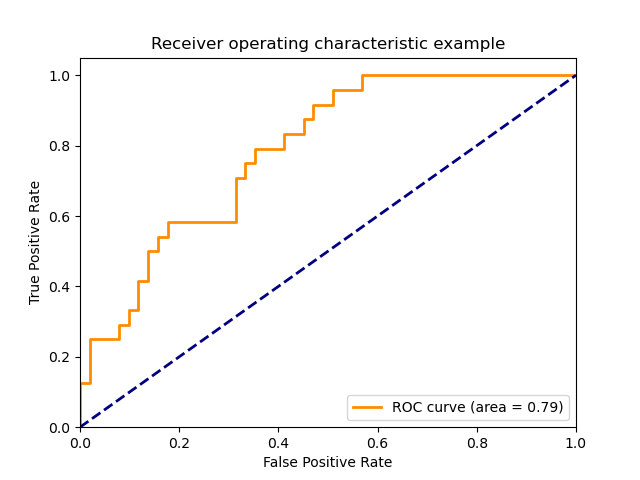

El AUC mide toda el área por debajo de la curva ROC, va de 0 a 1. 
En la imagen de ejemplo es de 0.79, se busca que esté entre 0.6 y 0.9, ya que menor a 0.6 indica que el modelo no predice bien y mayor a 0.9 indica que hay sobreajuste.

Podemos hacer el cálculo de los datos del ejemplo anterior con la siguiente función:

In [4]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, y_pred)

0.7000000000000001

Para **modelos de regresión** las principales métricas son:

**1. Varianza explicada**

Esta se calcula:

$var.explicada(y,\hat y)=1- \frac{Var(y-\hat y)}{Var(y)}$

Donde el $\hat y$ corresponde a los valores predichos y el mejor valor posible de la varianza explicada es 1.

Podemos hacer el cálculo con la función **explained_variance_score**.

Ejemplo donde los valores predichos se acercan a los valores reales.

In [5]:
from sklearn.metrics import explained_variance_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
explained_variance_score(y_true, y_pred)

0.9571734475374732

Ejemplo donde los valores predichos no se acercan a los valores reales.

In [6]:
y_true = [3, -0.5, 2, 7]
y_pred = [1.5, 3.0, 4, 5]
explained_variance_score(y_true, y_pred)

0.2633832976445396

**2. Error Absoluto Medio (MAE)**

El error absoluto medio (MAE) se calcula:

$MAE(y,\hat y)=\frac{1}{n} * \sum_{i=0}^{n-1} |y_i-\hat y_i|$

Donde $\hat y_i$ es el valor predicho de la i-ésima muestra y $ y_i$ es el valor verdadero.

Ejemplo donde los valores predichos se acercan a los valores reales.

In [7]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

Ejemplo donde los valores predichos no se acercan a los valores reales.

In [8]:
y_true = [3, -0.5, 2, 7]
y_pred = [1.5, 3.0, 4, 5]
mean_absolute_error(y_true, y_pred)

2.25

**3. Error cuadrático medio (MSE)**

El MSE se calcula:

$MSE(y,\hat y)=\frac{1}{n} * \sum_{i=0}^{n-1} (y_i-\hat y_i)^2$

Donde $\hat y_i$ es el valor predicho de la i-ésima muestra y $ y_i$ es el valor verdadero.

Ejemplo donde los valores predichos se acercan a los valores reales.

In [9]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

Ejemplo donde los valores predichos no se acercan a los valores reales.

In [10]:
y_true = [3, -0.5, 2, 7]
y_pred = [1.5, 3.0, 4, 5]
mean_squared_error(y_true, y_pred)

5.625

**4. Coeficiente de determinación** $R^2$ 

El $R^2$ representa la proporción de la varianza de **y** explicada por los predictores del modelo

El $R^2$ se calcula:

$R^2= 1- \frac{\sum_{i=0}^{n-1} (y_i-\hat y_i)^2}{\sum_{i=0}^{n-1} (y_i-\bar y_i)^2}  $

Donde $\hat y_i$ es el valor predicho de la i-ésima muestra, $ y_i$ es el valor verdadero y $\bar y_i= \frac{\sum_{i=0}^{n-1} y_i}{n}$.

Ejemplo donde los valores predichos se acercan a los valores reales.

In [11]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

Ejemplo donde los valores predichos no se acercan a los valores reales.

In [12]:
y_true = [3, -0.5, 2, 7]
y_pred = [1.5, 3.0, 4, 5]
r2_score(y_true, y_pred)

0.22912205567451815

**Datos**

Este dataset se utiliza para predecir si un paciente puede sufrir un accidente cerebrovascular en función de variables como el sexo, la edad, diversas enfermedades y el tabaquismo.


In [13]:
import numpy as np
import pandas as pd

data=pd.read_csv('https://raw.githubusercontent.com/FabianParra24/Apredizaje-Automatico/master/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
data.shape

(5110, 12)

In [15]:
features=["gender","age","hypertension","heart_disease","ever_married","work_type","Residence_type","avg_glucose_level",
          "bmi","smoking_status","stroke"]
data=data[features]

#### Limpieza de datos

Podemos saber si hay otros códigos en gender u otras columnas utilizando:

In [16]:
data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [17]:
data.drop(data[data['gender'] == 'Other'].index, inplace = True)

In [18]:
data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [20]:
data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [21]:
data['hypertension'].unique()

array([0, 1], dtype=int64)

In [22]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [23]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Busacamos si tenemos valores nulos.

In [24]:
print(data['heart_disease'].isnull().sum())
print(data['avg_glucose_level'].isnull().sum())
print(data['bmi'].isnull().sum())
print(data['stroke'].isnull().sum())

0
0
201
0


Los reemplazamos con la media.

In [25]:
data.fillna(data.mean(), inplace = True)

In [26]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.894560,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.698235,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Observemos los datos atípicos

In [27]:
import bokeh as bkh
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics as st


def plot_data(df, col_x, col_y, label_x, label_y, val_title):
    # Imprime gráfica de dispersión. 
    
    plt.figure(figsize=(7,7))
    plt.scatter(x=df[col_x],y=df[col_y])
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(val_title)
    plt.show()
    

Notamos que en relación de age y el nivel de glucosa promedio no encontramos valores extremos, por lo que decidimos no eliminar valores.

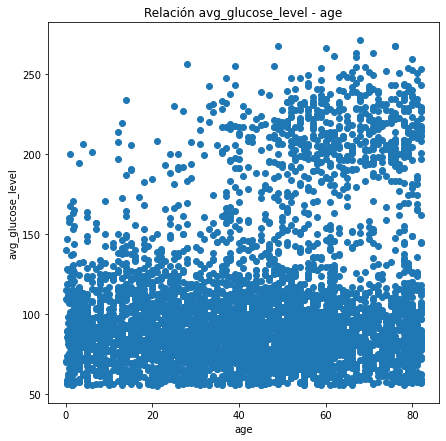

In [28]:
plot_data(data, 'age', 'avg_glucose_level', 'age', 'avg_glucose_level',
          'Relación avg_glucose_level - age') 

Sin embargo, para la comparacion de los niveles de glucosa y el bmi, si hay algunos valores extremos. Eliminamos los mayores a 70.

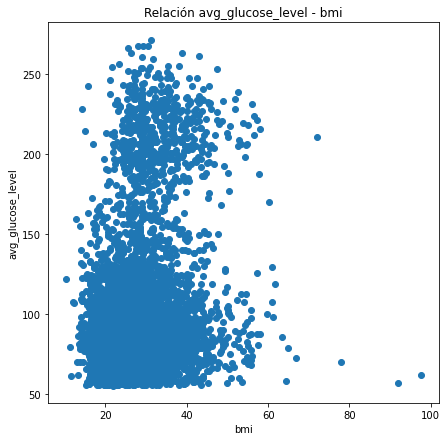

In [29]:
plot_data(data, 'bmi', 'avg_glucose_level', 'bmi', 'avg_glucose_level',
          'Relación avg_glucose_level - bmi')
data=data[data.bmi <=70]

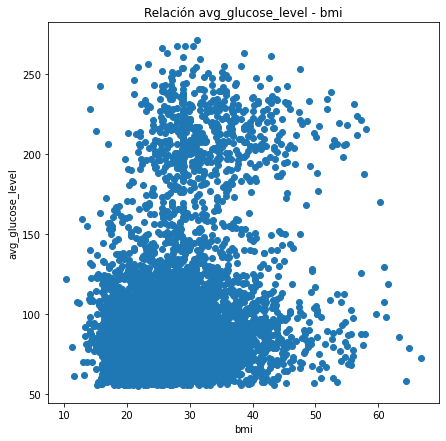

In [30]:
plot_data(data, 'bmi', 'avg_glucose_level', 'bmi', 'avg_glucose_level',
          'Relación avg_glucose_level - bmi')

El gráfico  de calor nos destaca las correlaciones entre todas las variables, donde colores más fuertes representan correlacciones más altas, siendo azul correlación negativa y rojo positiva.

Si queremos crear este gráfico solo es necesario utilizar la función con nuestros datos.

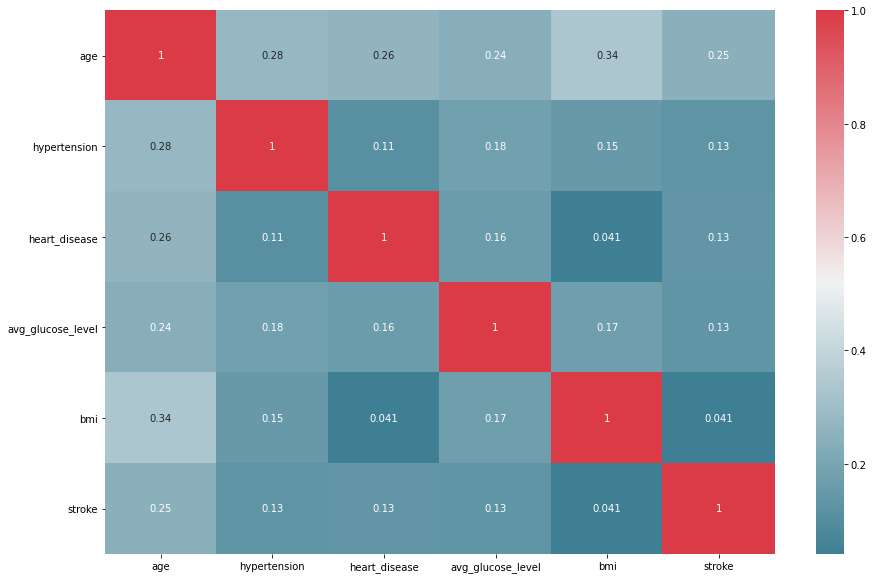

In [31]:
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(data.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(data)

Vemos que no hay correlaciones muy fuertes, asi que no eliminamos ninguna variable.

Remplazamos los valores categoricos por valores enteros para que sean parte del modelo.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [33]:
data.describe(include=object).T

,count,unique,top,freq
gender,5105,2,Female,2993
ever_married,5105,2,Yes,3351
work_type,5105,5,Private,2920
Residence_type,5105,2,Urban,2595
smoking_status,5105,4,never smoked,1890


In [34]:
categorical = data.select_dtypes('object').columns

In [35]:
data["gender"]=data["gender"].replace({'Male':0, 'Female':1,'Other':2 })

In [36]:
data['ever_married']=data['ever_married'].replace({'No':0, 'Yes':1})

In [37]:
data['Residence_type']=data['Residence_type'].replace({'Urban':0, 'Rural':1})

In [38]:
data['work_type']=data['work_type'].replace({'Private':0, 'Self-employed':1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4})

In [39]:
data['smoking_status']=data['smoking_status'].replace({'formerly smoked':0, 'never smoked':1, 'smokes': 2
                                                       , 'Unknown': 3})

#### Aplicación de 3 métodos de su elección de los vistos en clase

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score, plot_confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC

Se dividen los datos en entrenamiento y prueba.

In [41]:
y = data.iloc[:,10]
X = data.iloc[:,:10]
print(y)
print(X)

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5105, dtype: int64
      gender   age  hypertension  heart_disease  ever_married  work_type  \
0          0  67.0             0              1             1          0   
1          1  61.0             0              0             1          1   
2          0  80.0             0              1             1          0   
3          1  49.0             0              0             1          0   
4          1  79.0             1              0             1          1   
...      ...   ...           ...            ...           ...        ...   
5105       1  80.0             1              0             1          0   
5106       1  81.0             0              0             1          1   
5107       1  35.0             0              0             1          1   
5108       0  51.0             0              0             1          0   
5109       1 

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
X_train.shape

print(X_train)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
4164       1  82.0             1              0             1          0   
4090       1  42.0             0              0             1          2   
946        1  47.0             0              0             1          0   
2354       0  20.0             0              0             0          0   
3429       1  62.0             0              0             1          0   
...      ...   ...           ...            ...           ...        ...   
4431       1  57.0             0              0             1          0   
466        1  61.0             1              0             1          0   
3095       0  32.0             0              0             0          0   
3776       0  19.0             0              0             0          0   
861        0  71.0             0              0             0          0   

      Residence_type  avg_glucose_level       bmi  smoking_status  
4164               

In [69]:
X_test.shape

(1021, 10)

In [70]:
y_train.shape

(4084,)

In [71]:
y_test.shape

(1021,)

#### 1. Decision Trees

En primer lugar se crearan varios modelos cambiando la profundidad máxima de los árboles de decisión y se elige el que tiene una profundidad de 3. 

In [72]:
DecisionTreeModel = DecisionTreeClassifier(max_depth=3)
DecisionTreeModel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [73]:
y_pred = DecisionTreeModel.predict(X_test) 

In [74]:
dt1= accuracy_score(y_test,y_pred)
dt1

0.9382957884427032

In [75]:
DecisionTreeModel2 = DecisionTreeClassifier(max_depth=5)
DecisionTreeModel2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [76]:
y_pred2 = DecisionTreeModel2.predict(X_test) 

In [77]:
dt12= accuracy_score(y_test,y_pred2)
print(dt12)

0.9373163565132223


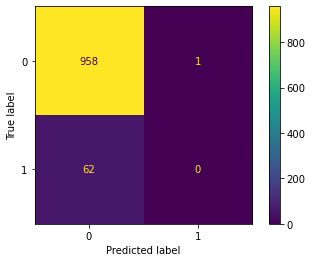

In [78]:
plot_confusion_matrix(DecisionTreeModel, X_test, y_test)  
plt.show()

In [79]:
from sklearn.tree import export_graphviz
#export_graphviz(DecisionTreeModel, out_file= "simple_tree2.dot", feature_names=features.columns)
#from subprocess import call
#call('dot','-T','png', 'simple_tree.dot', "-o",'simple_tree.png')

#### 2. Random Tree Forest

In [80]:
RandomForest = RandomForestClassifier(max_depth=2, random_state=9, min_samples_leaf=3, min_samples_split=20, n_estimators=100)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=3, min_samples_split=20,
                       random_state=9)

In [81]:
y_pred2 = RandomForest.predict(X_test) 
dt2= accuracy_score(y_test,y_pred2)
dt2

0.9392752203721841

Descubramos cuales son las variables mas importantes para el modelo:

In [82]:
importances=pd.DataFrame({"feature": X_train.columns, "importance": RandomForest.feature_importances_})
importances= importances.sort_values("importance", ascending=False).set_index("feature")
importances.head(10)

,importance
feature,
age,0.471961
avg_glucose_level,0.194350
heart_disease,0.122979
hypertension,0.073716
ever_married,0.053892
bmi,0.052977
work_type,0.018012
smoking_status,0.009238
Residence_type,0.001741


<AxesSubplot:xlabel='feature'>

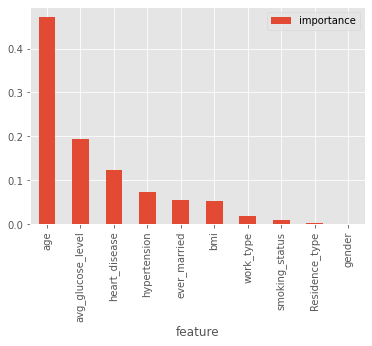

In [83]:
plt.style.use("ggplot")
importances.plot.bar()

Como se destaca en el cuadro y el grafico las variables mas relevantes son age, avg_glucose_level , heart disease, hypertension, ever_married y bmi. Por ello, generaremos un nuevo modelo con las variables mas importantes.

+ **Modelo Random Forest 2**

In [84]:
features2=["age","hypertension","heart_disease","ever_married","avg_glucose_level",
          "bmi"]

In [85]:
X_train2=X_train[features2]
X_train2

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi
4164,82.0,1,0,1,222.52,28.89456
4090,42.0,0,0,1,59.43,25.40000
946,47.0,0,0,1,204.63,43.40000
2354,20.0,0,0,0,87.08,27.10000
3429,62.0,0,0,1,98.05,27.90000
...,...,...,...,...,...,...
4431,57.0,0,0,1,64.37,32.80000
466,61.0,1,0,1,170.05,60.20000
3095,32.0,0,0,0,79.54,28.10000
3776,19.0,0,0,0,119.58,24.80000


In [86]:
X_test2=X_test[features2]

In [87]:
RandomForest2 = RandomForestClassifier(max_depth=2, random_state=9, min_samples_leaf=3, min_samples_split=20, n_estimators=100)
RandomForest2.fit(X_train2, y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=3, min_samples_split=20,
                       random_state=9)

In [88]:
y_pred2_2 = RandomForest2.predict(X_test2) 
dt2_2= accuracy_score(y_test,y_pred2_2)
dt2_2

0.9392752203721841

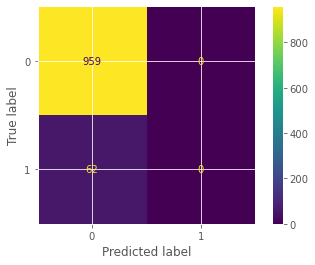

In [89]:
plot_confusion_matrix(RandomForest2, X_test2, y_test)  
plt.show()

Nos quedamos con el modelo mas simple para este caso, pues el puntaje de precision es casi identico al que tiene todos los features.

#### 3. KNeighbors

En primer lugar se crearan varios modelos cambiando la cantidad de vecinos de los K-Neighbors y se elige el que tiene una 12. 

In [90]:
KNeighborsModel=KNeighborsClassifier(n_neighbors = 12)
KNeighborsModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=12)

In [91]:
y_pred3 = KNeighborsModel.predict(X_test) 
dt3= accuracy_score(y_test,y_pred3)
dt3

0.9392752203721841

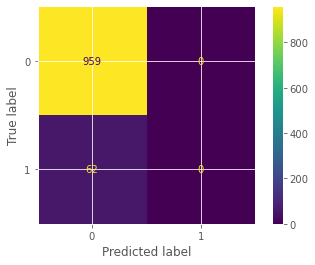

In [92]:
plot_confusion_matrix(KNeighborsModel, X_test, y_test)  
plt.show()

**Método de ensamble no visto en clase**

Los métodos de ensamblaje son métodos combinados de distintos algoritmos de aprendizaje para obtener una mejor precisión.

Los resultados de los modelos ensamblados son mejores principalmente por:

- Reducción de sesgo: al combinar varios modelos se promedian los sesgos y se reduce el error.

- Disminución de la varianza: los resultados de varios modelos son menos ruidosos que la de un solo modelo, por esto se reduce la varianza.

- Probabilidad baja de sobreajuste: se tienen varios modelos ajustados sin sobreajuste y al combinar las predicciones, no hay lugar al sobreajuste.

**4. Agregación de bootstrap (bagging)**

Ajusta los clasificadores en *m* subconjuntos aleatorios de los datos originales, que son *m* muestras bootstrap. Se ajustan modelos con las *m* muestras y luego por votación se obtiene una predicción final, es decir se construyen diferentes modelos y apartir de estos se obtiene la predicción.

In [93]:
Bagging = BaggingClassifier(base_estimator=SVC(), random_state=0)
Bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), random_state=0)

In [94]:
y_pred4 = Bagging.predict(X_test) 
dt4= accuracy_score(y_test,y_pred4)
dt4

0.9392752203721841

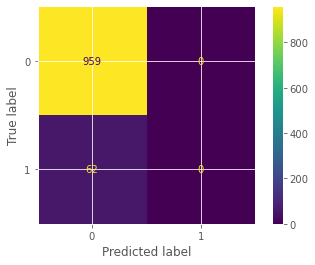

In [95]:
plot_confusion_matrix(Bagging, X_test, y_test)  
plt.show()

#### Probabilidades de Predicción

In [96]:
r_prob= [0 for _ in range(len(y_test))]
tree_prob= DecisionTreeModel.predict_proba(X_test)
#RF_prob=RandomForest.predict_proba(X_test)
RF2_prob=RandomForest2.predict_proba(X_test2)
KNeighbors_prob= KNeighborsModel.predict_proba(X_test)
Bagging_prob=Bagging.predict_proba(X_test)

In [97]:
tree_prob= tree_prob[:, 1]
#RF_prob= RF_prob[:, 1]
RF2_prob= RF2_prob[:, 1]
KNeighbors_prob= KNeighbors_prob[:, 1]
Bagging_prob= Bagging_prob[:, 1]

#### Calcular AUC

In [98]:
r_auc=roc_auc_score(y_test,r_prob)
tree_auc= roc_auc_score(y_test,tree_prob)
#RF_auc= roc_auc_score(y_test,RF_prob)
RF2_auc= roc_auc_score(y_test,RF2_prob)
KNeighbors_auc= roc_auc_score(y_test,KNeighbors_prob)
Bagging_auc=roc_auc_score(y_test,Bagging_prob)

In [99]:
print("Random(Chance) : AUROC = %.3f" % (r_auc))
print("Decision Tree : AUROC = %.3f" % (tree_auc))
#print("Random Forest : AUROC = %.3f" % (RF_auc))
print("Random Forest2 : AUROC = %.3f" % (RF2_auc))
print("KNeighbors : AUROC = %.3f" % (KNeighbors_auc))
print("Baging : AUROC = %.3f" % (Bagging_auc))

Random(Chance) : AUROC = 0.500
Decision Tree : AUROC = 0.798
Random Forest2 : AUROC = 0.832
KNeighbors : AUROC = 0.765
Baging : AUROC = 0.500


#### Calcular ROC

In [100]:
r_fpr, r_tpr, _=roc_curve(y_test,r_prob)
tree_fpr, tree_tpr, _=roc_curve(y_test,tree_prob)
#rf_fpr, rf_tpr, _=roc_curve(y_test,RF_prob)
rf2_fpr, rf2_tpr, _=roc_curve(y_test,RF2_prob)
kn_fpr, kn_tpr, _=roc_curve(y_test,KNeighbors_prob)
bg_fpr, bg_tpr, _=roc_curve(y_test,Bagging_prob)

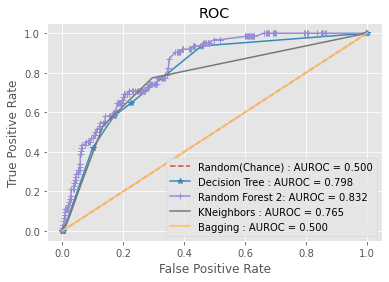

In [101]:
plt.plot(r_fpr, r_tpr, linestyle="--", label= "Random(Chance) : AUROC = %.3f" % (r_auc))
plt.plot(tree_fpr, tree_tpr, marker="*", label= "Decision Tree : AUROC = %.3f" % (tree_auc))
#plt.plot(rf_fpr, rf_tpr, marker="+", label= "Random Forest : AUROC = %.3f" % (RF_auc))
plt.plot(rf2_fpr, rf2_tpr, marker="+", label= "Random Forest 2: AUROC = %.3f" % (RF2_auc))
plt.plot(kn_fpr, kn_tpr, marker=",", label= "KNeighbors : AUROC = %.3f" % (KNeighbors_auc))
plt.plot(bg_fpr, bg_tpr, marker=",", label= "Bagging : AUROC = %.3f" % (Bagging_auc))
plt.title("ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

**Comparación de modelos:**

Podemos observar que los resultados del accuracy_score los modelos no varían mucho, todos indican que los modelos tienen buena precisión, por lo que se toma la curva de ROC, su AUC, PP y FP como métrica para tomar la decisión. 

Con estos resultados se puede concluir que el mejor modelo es Random Forest, ya que tiene la mayoría de puntajes más altos y no cae en sobre-ajuste.

Sin embargo, con varios modelos se obtienen resultados aceptables, esto se puede dar debido a la **importancia** de algunas variables, por ejemplo: los **Niveles de Glucosa** y las **Enfermedades Cardíacas** son factores de riesgo importantes en los Accidentes Cerebrovasculares, además estas variables aumentan con la **Edad**, otra variable de gran importancia en los datos. 

Con esto podemos concluir que las variables incluidas en este modelo ayudan a predecir la presencia de Accidentes Cardiovasculares con una buena precisión. 